In [95]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv('Cancer_Data.csv')

In [97]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [98]:
df.drop("id", axis=1, inplace=True)

In [99]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [100]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [101]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [104]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy_score(y_train, y_pred_train) 
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test) 
print(f"Training Accuracy: {train_accuracy:.3f}") 
print(f"Test Accuracy: {test_accuracy:.3f}")

Training Accuracy: 1.000
Test Accuracy: 0.947


In [106]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [129]:
def entropy(y):
    probs = np.bincount(y) / len(y)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

total_entropy = entropy(y_train)
print(f"Total Dataset Entropy: {total_entropy:.4f}")

feature = 'radius_mean'
threshold = X_train[feature].median()

left_mask = X_train[feature] <= threshold
right_mask = X_train[feature] > threshold

y_left = y_train[left_mask]
y_right = y_train[right_mask]

entropy_left = entropy(y_left)
entropy_right = entropy(y_right)

weighted_entropy = (len(y_left) / len(y_train)) * entropy_left + (len(y_right) / len(y_train)) * entropy_right

information_gain = total_entropy - weighted_entropy

print(f"Split on '{feature}' at threshold {threshold:.2f}:")
print(f"Left entropy: {entropy_left:.3f} ({len(y_left)} samples)")
print(f"Right entropy: {entropy_right:.3f} ({len(y_right)} samples)")
print(f"Weighted entropy: {weighted_entropy:.3f}")
print(f"Information gain: {information_gain:.3f}")

Total Dataset Entropy: 0.9518
Split on 'radius_mean' at threshold 13.30:
Left entropy: 0.367 (228 samples)
Right entropy: 0.911 (227 samples)
Weighted entropy: 0.638
Information gain: 0.314


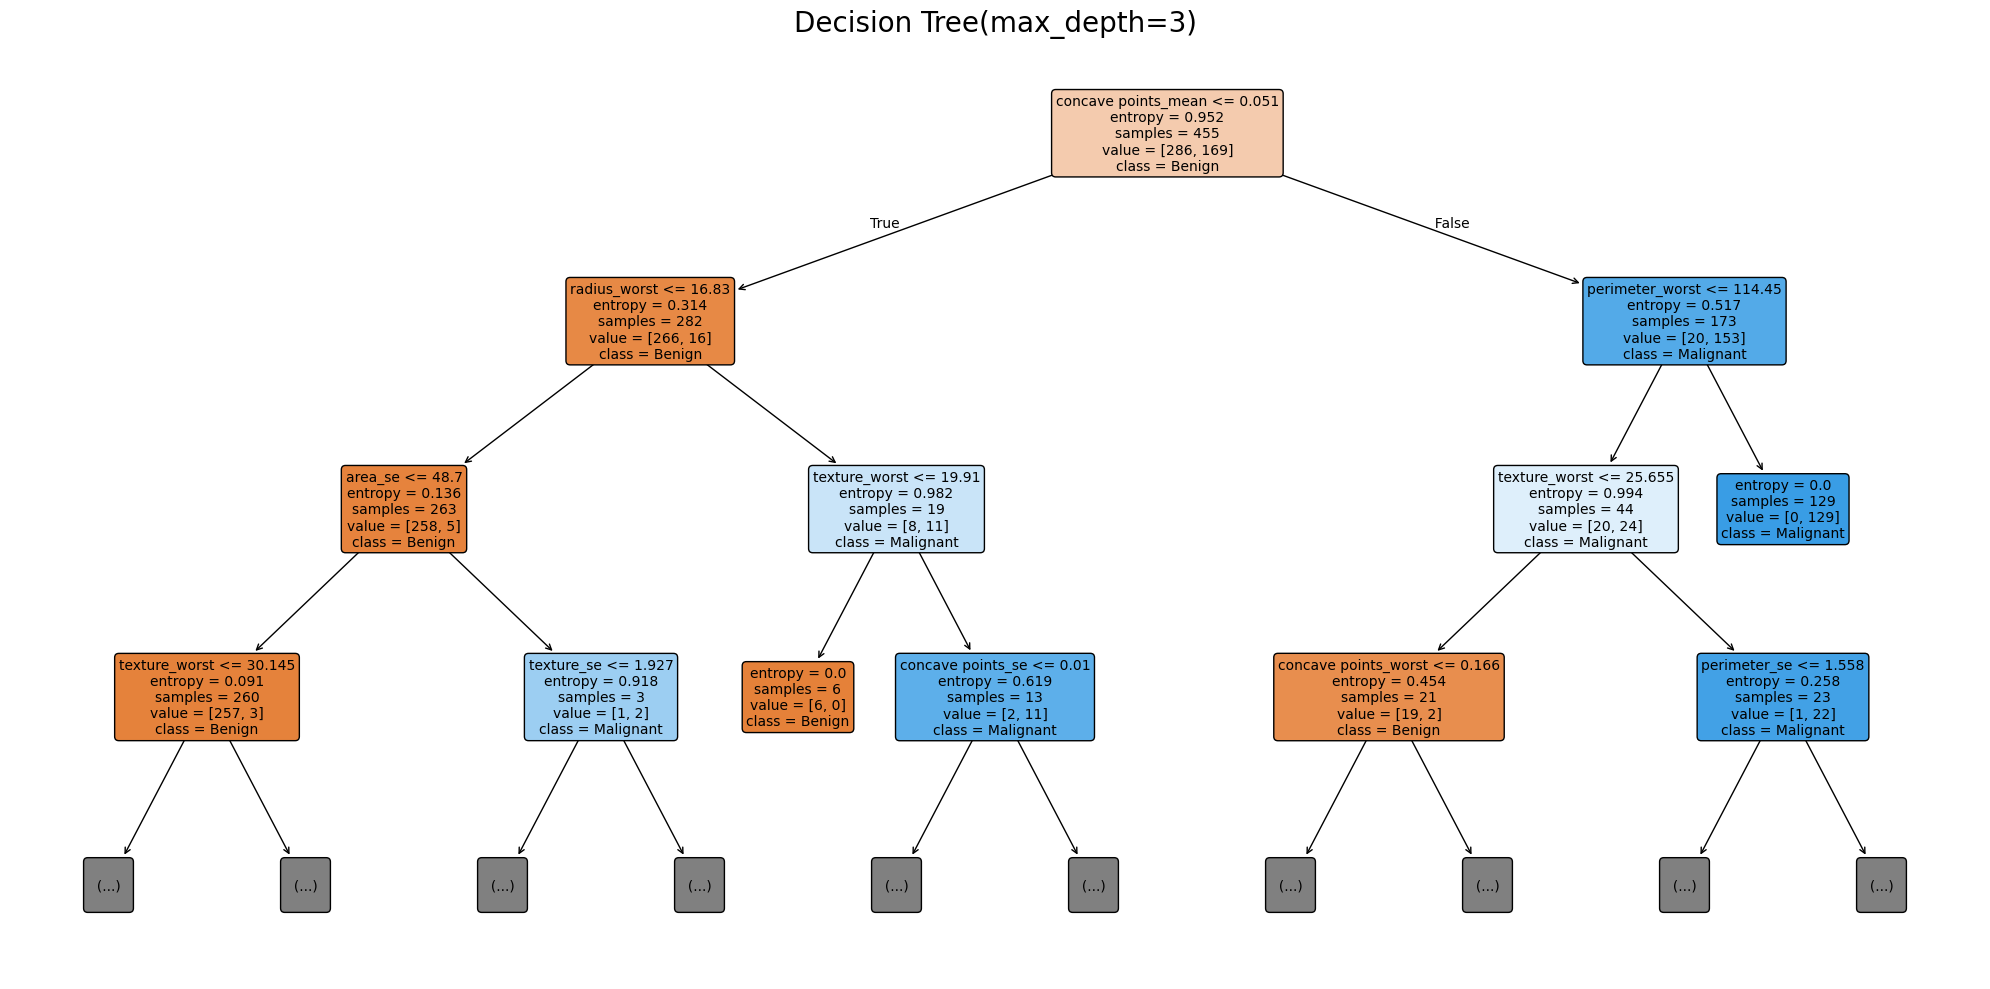

In [130]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(
    model,               
    max_depth=3,                
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree(max_depth=3)", fontsize=20)
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

In [131]:
depths = [1, 3, 5, 7, 9, 15, 20, None]
train_scores = []
test_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=depth,
        random_state=42
    )
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    
    depth_str = str(depth) if depth is not None else "None"
    gap = train_acc - test_acc
    
    print(f"\nDepth={depth_str:5s} Train:{train_acc:.4f}  Test:{test_acc:.4f}  Gap:{gap:.4f}")


Depth=1     Train:0.9209  Test:0.8947  Gap:0.0261

Depth=3     Train:0.9802  Test:0.9649  Gap:0.0153

Depth=5     Train:0.9934  Test:0.9474  Gap:0.0460

Depth=7     Train:1.0000  Test:0.9474  Gap:0.0526

Depth=9     Train:1.0000  Test:0.9474  Gap:0.0526

Depth=15    Train:1.0000  Test:0.9474  Gap:0.0526

Depth=20    Train:1.0000  Test:0.9474  Gap:0.0526

Depth=None  Train:1.0000  Test:0.9474  Gap:0.0526


In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Grid Search best parameters:")
print(grid_search.best_params_)
print(f"Best CV score: {grid_search.best_score_:.4f}")
print(f"Test accuracy: {grid_search.score(X_test, y_test):.4f}")

Grid Search best parameters:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.9429
Test accuracy: 0.9649


In [133]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 15),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Random Search best parameters:")
print(random_search.best_params_)
print(f"Best CV score: {random_search.best_score_:.4f}")
print(f"Test accuracy: {random_search.score(X_test, y_test):.4f}")

Random Search best parameters:
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 11}
Best CV score: 0.9429
Test accuracy: 0.9474


In [134]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 25),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }
    
    clf = DecisionTreeClassifier(**params, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Optuna best parameters:")
print(study.best_params)
print(f"Best CV score: {study.best_value:.4f}")

best_params = study.best_params.copy()
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

print(f"Test accuracy: {best_clf.score(X_test, y_test):.4f}")

[I 2026-01-10 23:42:33,873] A new study created in memory with name: no-name-91a2c259-a4eb-450c-ab84-f595706cac40


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-10 23:42:33,932] Trial 0 finished with value: 0.9208791208791208 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9208791208791208.
[I 2026-01-10 23:42:33,968] Trial 1 finished with value: 0.9142857142857143 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9208791208791208.
[I 2026-01-10 23:42:34,001] Trial 2 finished with value: 0.9340659340659341 and parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9340659340659341.
[I 2026-01-10 23:42:34,037] Trial 3 finished with value: 0.9340659340659341 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9340659340659341.
[I 2026-01-10 23:42:34,065] Trial 4 finished with value: 0.9142857142857143 and par

In [137]:
print("Hyperparameter Tuning results:")
print("Optuna best parameters:")
print(study.best_params)
print(f"Best CV score: {study.best_value:.4f}")
print(f"Test accuracy: {best_clf.score(X_test, y_test):.4f}\n")

print("Grid Search best parameters:")
print(grid_search.best_params_)
print(f"Best CV score: {grid_search.best_score_:.4f}")
print(f"Test accuracy: {grid_search.score(X_test, y_test):.4f}\n")

print("Random Search best parameters:")
print(random_search.best_params_)
print(f"Best CV score: {random_search.best_score_:.4f}")
print(f"Test accuracy: {random_search.score(X_test, y_test):.4f}")


Hyperparameter Tuning results:
Optuna best parameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3}
Best CV score: 0.9473
Test accuracy: 0.9737

Grid Search best parameters:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.9429
Test accuracy: 0.9649

Random Search best parameters:
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 11}
Best CV score: 0.9429
Test accuracy: 0.9474


In [138]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=80,
    criterion='entropy',
    max_depth=8,
    random_state=42,
    n_jobs=-1,
    oob_score=True  
)

rf_classifier.fit(X_train, y_train)

y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Random Forest Training Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_acc_rf:.4f}")
print(f"Number of trees: {rf_classifier.n_estimators}")
print(f"Out-of-bag score: {rf_classifier.oob_score_:.4f}")

Random Forest Training Accuracy: 0.9978
Random Forest Test Accuracy: 0.9649
Number of trees: 80
Out-of-bag score: 0.9692


In [139]:
importances = rf_classifier.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]  

top_n = min(10, len(feature_names))

print("Top 10 most important features:")
for i in range(top_n):
    feature = feature_names[indices[i]]
    importance = importances[indices[i]]
    print(f"{i+1}.{feature}: {importance:.4f}")

Top 10 most important features:
1.concave points_worst: 0.1394
2.concave points_mean: 0.1029
3.area_worst: 0.1013
4.perimeter_worst: 0.0893
5.concavity_mean: 0.0776
6.radius_worst: 0.0697
7.area_mean: 0.0539
8.perimeter_mean: 0.0451
9.radius_mean: 0.0450
10.concavity_worst: 0.0417


In [142]:
print("Model Comparison")
print(f"Decision Tree test accuracy: {test_accuracy:.4f}")
print(f"Random Forest test accuracy: {test_acc_rf:.4f}")
print(f"Improvement: {(test_acc_rf - test_accuracy)*100:.2f}%")

Model Comparison
Decision Tree test accuracy: 0.9474
Random Forest test accuracy: 0.9649
Improvement: 1.75%


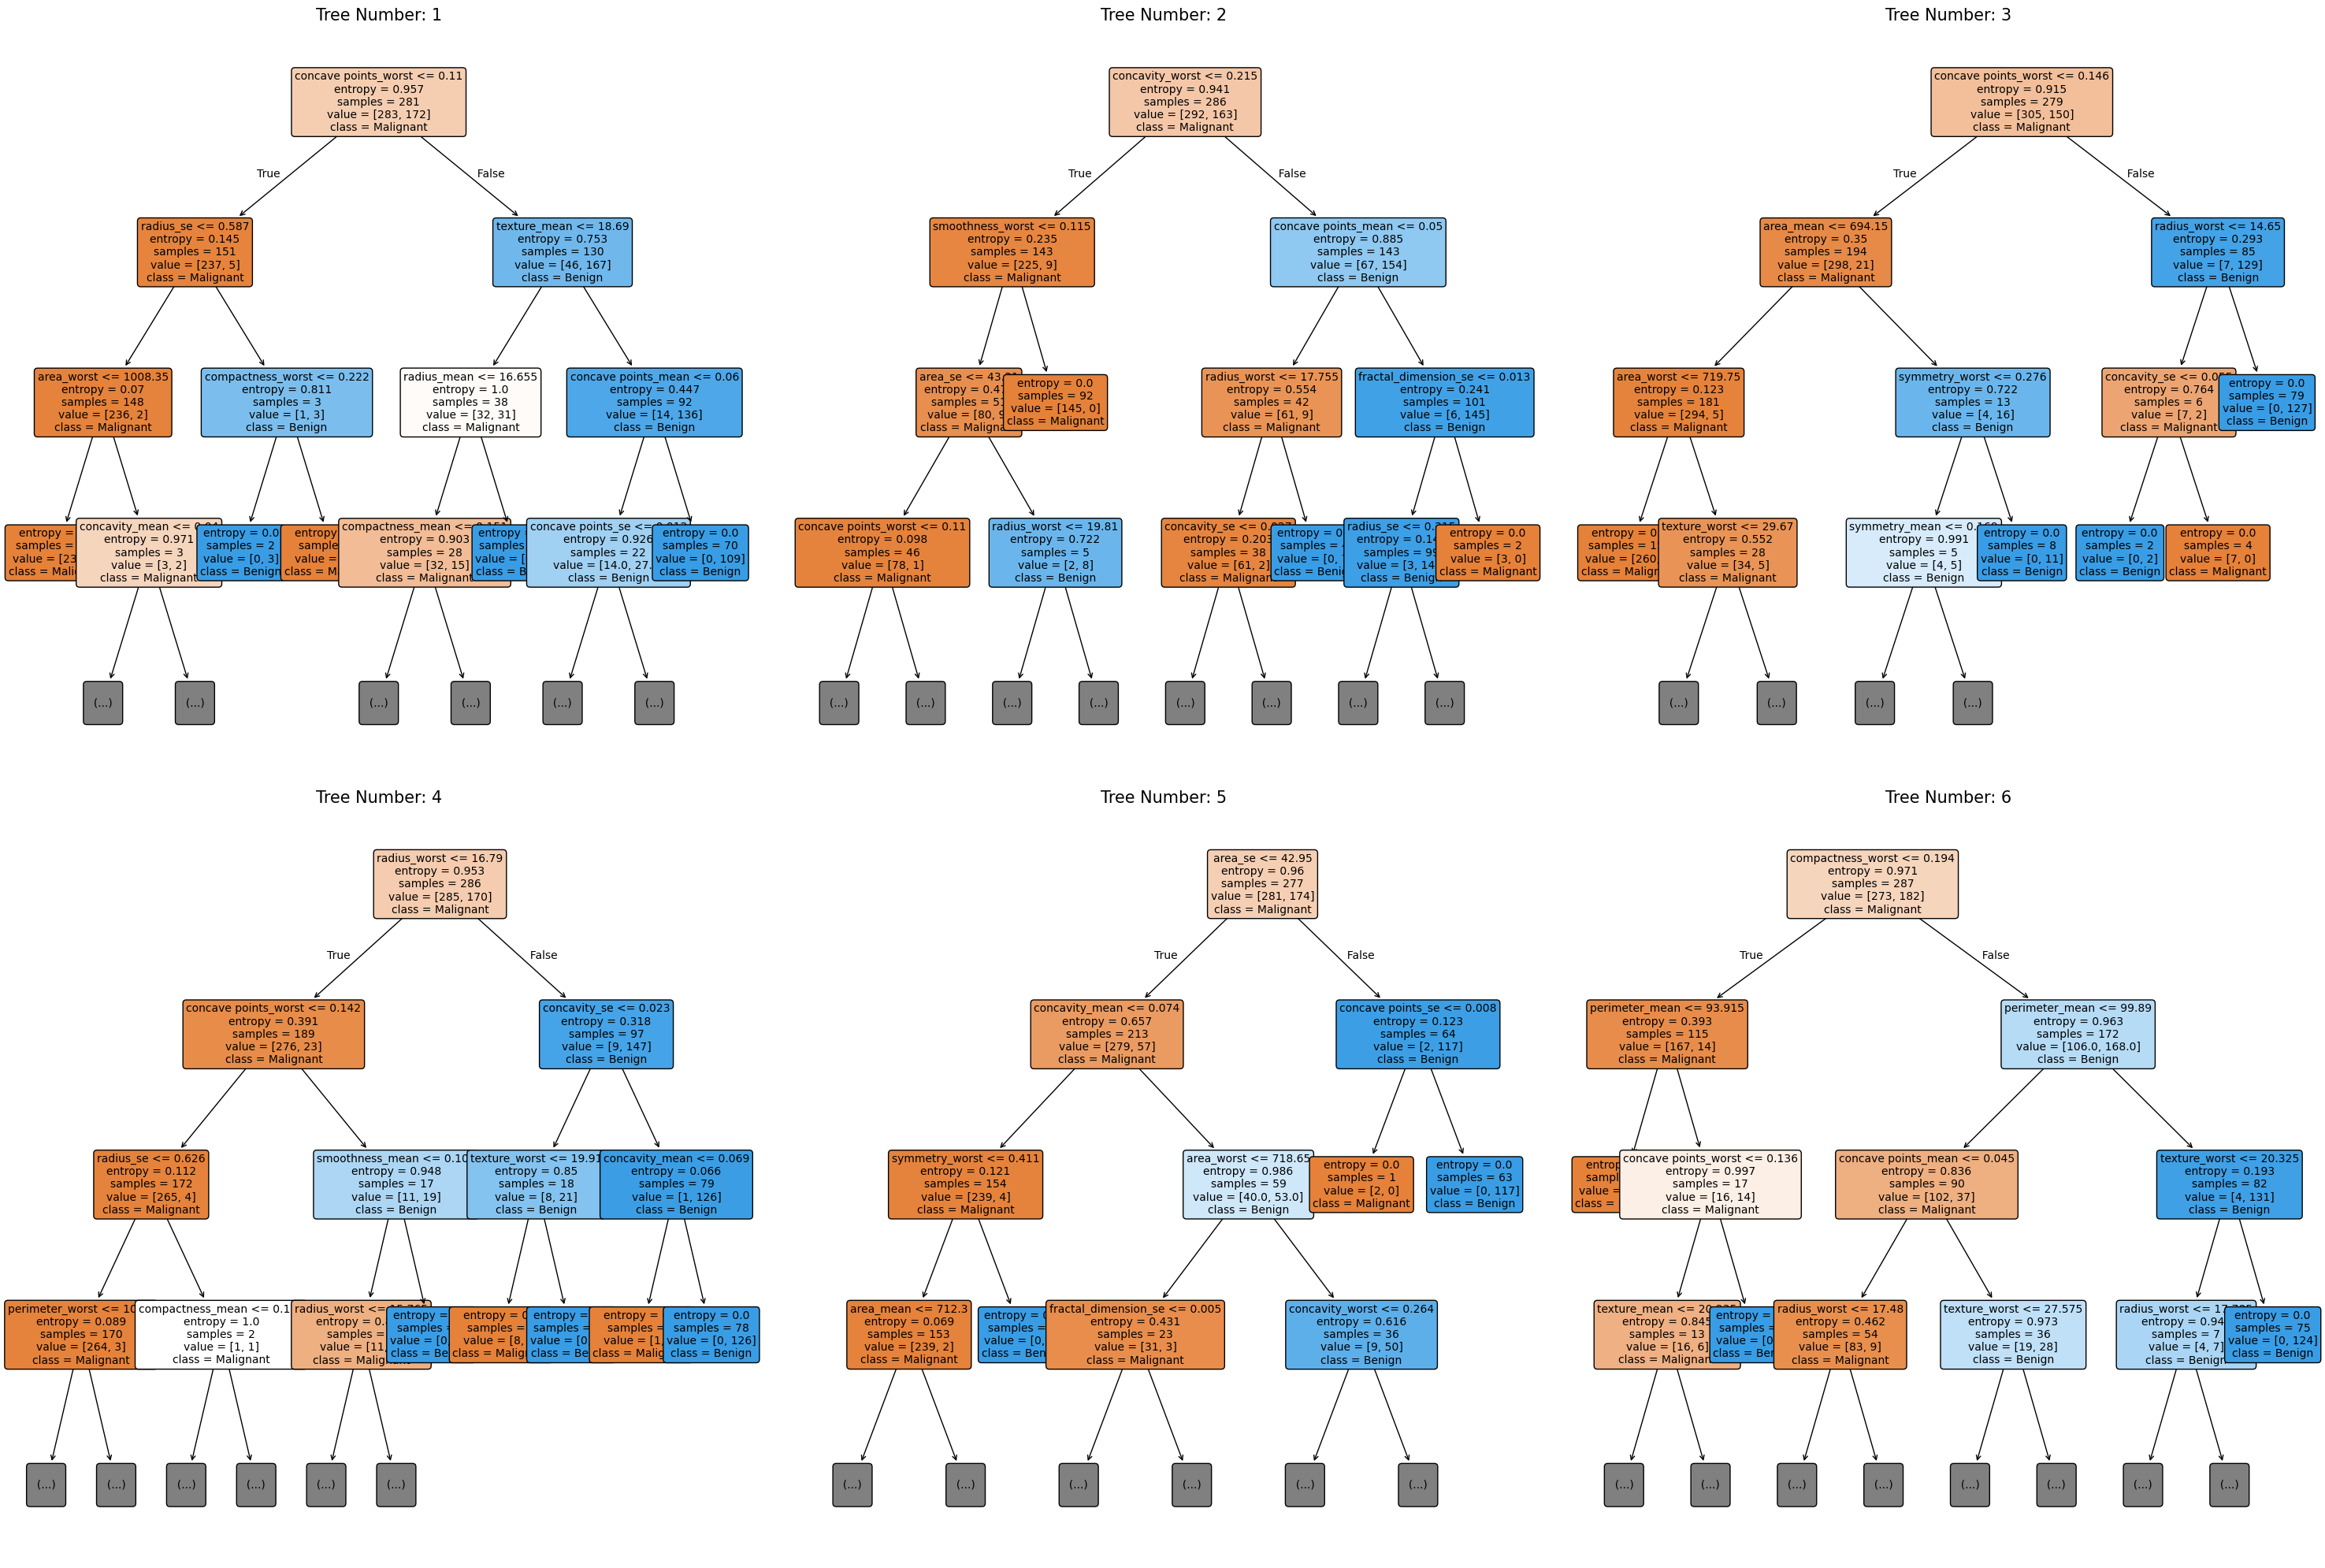

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

for idx in range(6):
    plot_tree(rf_classifier.estimators_[idx], 
              max_depth=3, 
              feature_names=X_train.columns, 
              class_names=['Malignant', 'Benign'], 
              filled=True, 
              rounded=True, 
              ax=axes[idx], 
              fontsize=10)
    
    axes[idx].set_title(f'Tree Number: {idx + 1}', fontsize=15)

plt.tight_layout()
plt.show()